## Linear Discriminant Analysis

We test this on the wines dataset.
The wines dataset represents 3 kind of wines (Barolo, Barbaresco and Grignolino) with *p* attributes.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [ ]:
data = pd.read_csv(r'C:\Users\Gebruiker\Desktop\Desktop_Ghent\Notebooks\datasets\wines.csv', sep=';', header=0, index_col=0)

In [ ]:
data

In [ ]:
sns.kdeplot(data=data, x="Ash", hue="Category", multiple="stack");

In [ ]:
X = data.iloc[:,1:14]
X

In [ ]:
from sklearn.preprocessing import scale
X = scale(X.values)
X

In [ ]:
y = data.Category
y

In [ ]:
lda = LDA(n_components=2) # N-1 where N are the classes
scores_lda = lda.fit(X, y).transform(X)

In [ ]:
print(lda.priors_)

The LDA output indicates prior probabilities of  π^1=0.269, π^2=0.331 and  π^3=0.398 ; in other words, 26.9% of the training observations correspond to type Barolo category.

In [ ]:
print(lda.means_)

The above provides the **group means**; these are the average of each predictor **within each class**

In [ ]:
print(lda.coef_[0:2,:])

The predict() function returns a list of LDA’s predictions about the training data:

In [ ]:
pred=lda.predict(X)
print(np.unique(pred, return_counts=True))

The model assigned 48 observations to the Barbera class, 59 to Barolo and 71 tp Grignolino. Let's check out the confusion matrix to see how this model is doing.

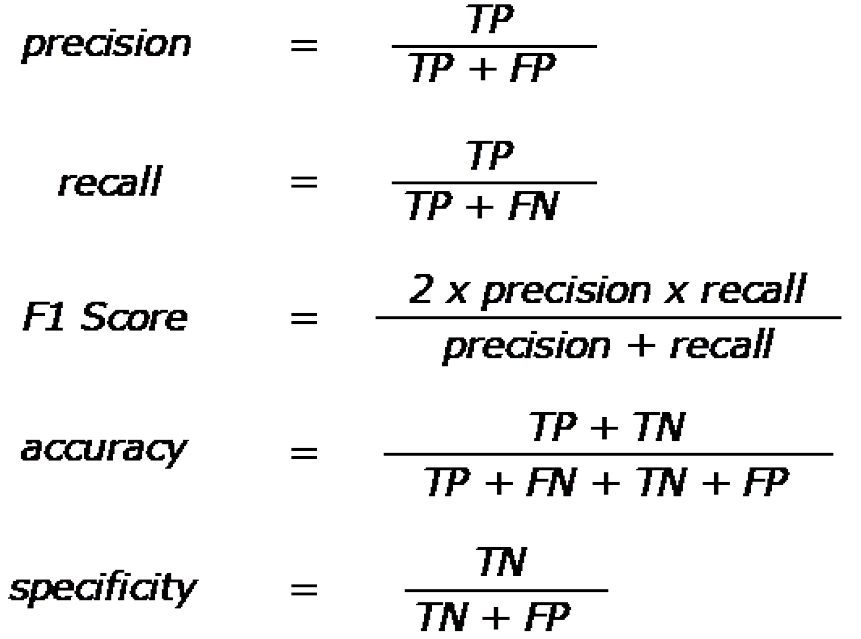

In [ ]:
print(confusion_matrix(pred, y))
print(classification_report(y, pred, digits=3))

In [ ]:
scores = pd.DataFrame(data = scores_lda, columns = ['LV1','LV2']) # latent variables
scores.index = data.index
scores

In [ ]:
scores = pd.concat([scores, y], axis = 1)
print(scores)

In [ ]:
print('explained variance ratio (first two components) with LDA: %s'
  % str(lda.explained_variance_ratio_))

In [ ]:
lda.explained_variance_ratio_

In [ ]:
loadings = pd.DataFrame(lda.coef_.T[:,0:2],columns = ["LV1","LV2"])
loadings["Attributes"] = data.iloc[:,1:14].columns
loadings

In [ ]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x="LV1", y="LV2", color="Category", hover_data=['Category'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [ ]:
# Loadings plot
fig = px.scatter(loadings, x="LV1", y="LV2",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

In [ ]:
sns.kdeplot(data=data, x="Phenols", hue="Category", multiple="stack");

### Confusion matrix and metrics - on test set

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
lda = LDA()
lda.fit(X_train, y_train)

In [ ]:
lda.predict(X_test)

In [ ]:
y_pred = lda.predict(X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

In [ ]:
plot_confusion_matrix(lda, X_test, y_test)  
plt.show()

In [ ]:
pred_lda=lda.predict(X_test)
pred_lda

In [ ]:
print(classification_report(y_test, pred_lda, digits=3))

In [ ]:
plot_confusion_matrix(lda, X_test, y_test)  
plt.show()

In [ ]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

In [ ]:
# Prepare the matrix and data for tp, tn, fp and tn
tp = np.zeros(cmatrix.shape[0]) # true positive
fn = np.zeros(cmatrix.shape[0]) # false positive
fp = np.zeros(cmatrix.shape[0]) # false positive
tn = np.zeros(cmatrix.shape[0]) # true negative
tot = 0
for i in range(cmatrix.shape[0]):
    #print("--------")
    for j in range(cmatrix.shape[1]):
        #print("j vale ",j)
        if i==j:
            tp[i] = cmatrix[i,i]
        else:
            fn[i] = fn[i] + cmatrix[i,j]
            fp[i] = fp[i] + cmatrix[j,i]
        tot = tot + cmatrix[i,j]
for i in range(cmatrix.shape[0]):
    tn[i] = tot - tp[i] - fn[i] - fp[i]
    #print("tn:",tn[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    print("True positive for the class",i,"are",tp[i])
for i in range(cmatrix.shape[0]):
    print("False negative for the class",i,"are",fn[i])
for i in range(cmatrix.shape[0]):
    print("False positive for the class",i,"are",fp[i])
for i in range(cmatrix.shape[0]):
    print("True negative for the class",i,"are",tn[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    sens = tp[i]/(tp[i]+fn[i])
    spec = tn[i]/(tn[i]+fp[i])
    acc = (tp[i]+tn[i])/(tp[i]+tn[i]+fp[i]+fn[i])
    print("The sensitivity for the class",i,"is:",sens)
    print("The specificity for the class",i,"is:",spec)
    print("The accuracy for the class",i,"is:",acc)

## Quadratic Discriminant Analysis (QDA)

In [ ]:
qda = QDA()
qda = qda.fit(X_train, y_train)
print(qda.priors_)

In [ ]:
print(qda.means_)

The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [ ]:
qda.predict(X_test)

In [ ]:
pred_qda=qda.predict(X_test)
print(np.unique(pred_qda, return_counts=True))

In [ ]:
print(confusion_matrix(pred_qda, y_test))

In [ ]:
print(classification_report(y_test, pred_qda, digits=3))

In [ ]:
cmatrix = confusion_matrix(pred_qda, y_test)
cmatrix

In [ ]:
# Prepare the matrix and data for tp, tn, fp and tn
tp = np.zeros(cmatrix.shape[0]) # true positive
fn = np.zeros(cmatrix.shape[0]) # false positive
fp = np.zeros(cmatrix.shape[0]) # false positive
tn = np.zeros(cmatrix.shape[0]) # true negative
tot = 0
for i in range(cmatrix.shape[0]):
    #print("--------")
    for j in range(cmatrix.shape[1]):
        #print("j vale ",j)
        if i==j:
            tp[i] = cmatrix[i,i]
        else:
            fn[i] = fn[i] + cmatrix[i,j]
            fp[i] = fp[i] + cmatrix[j,i]
        tot = tot + cmatrix[i,j]
for i in range(cmatrix.shape[0]):
    tn[i] = tot - tp[i] - fn[i] - fp[i]
    #print("tn:",tn[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    print("True positive for the class",i,"are",tp[i])
for i in range(cmatrix.shape[0]):
    print("False negative for the class",i,"are",fn[i])
for i in range(cmatrix.shape[0]):
    print("False positive for the class",i,"are",fp[i])
for i in range(cmatrix.shape[0]):
    print("True negative for the class",i,"are",tn[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    sens = tp[i]/(tp[i]+fn[i])
    spec = tn[i]/(tn[i]+fp[i])
    acc = (tp[i]+tn[i])/(tp[i]+tn[i]+fp[i]+fn[i])
    print("The sensitivity for the class",i,"is:",sens)
    print("The specificity for the class",i,"is:",spec)
    print("The accuracy for the class",i,"is:",acc)

## Partial Least Squares (PLS) - Discriminant Analysis (DA)

In [ ]:
from sklearn.cross_decomposition import PLSRegression as PLSR

In [ ]:
y = y.astype('category')
y

In [ ]:
y = y.cat.codes
y

In [ ]:
regr_pls = PLSR(n_components=3)
PLS_scores=regr_pls.fit_transform(X,y)
print(regr_pls.x_scores_)

In [ ]:
scores = regr_pls.x_scores_
scores

In [ ]:
scores = pd.DataFrame(scores, columns = ['LV1','LV2','LV3'])
scores.index = data.index
y = data.Category
scores = pd.concat([scores, y], axis = 1)
scores

In [ ]:
loadings = pd.DataFrame(regr_pls.x_loadings_,columns = ["LV1",'LV2','LV3'])
loadings["Attributes"] = data.iloc[:,1:14].columns
loadings

In [ ]:
import plotly.express as px
fig = px.scatter(scores, x="LV1", y="LV2", color="Category", hover_data=['Category'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [ ]:
# Loadings plot
fig = px.scatter(loadings, x="LV1", y="LV2",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

In [ ]:
sns.kdeplot(data=data, x="Hue", hue="Category", multiple="stack");